<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Apple_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
# lets check the info of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
# lets check the Total records and columns names:
print(f"Total Records are:{df.shape}\n")
print(f"Columns are:\n{df.columns}")

Total Records are:(4001, 9)

Columns are:
Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [5]:
# lets see the null values:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
# Total we have 4001 record if 1 null value is drop then there will be no any impact on data:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
# lets see the output data is in proportion or not:
print(f"Output data proportionality:\n{df.Quality.value_counts(normalize=True)*100}\n")
print("*"*100)
print(f"We have another method to check the output data prportionality:\n")
class_good = np.round(df[df.Quality == "good"].shape[0]/df.shape[0]*100,2)
class_bad = np.round(df[df.Quality== "bad"].shape[0]/df.shape[0]*100,2)
print(f"class good data:{class_good}\n")
print(f"class bad data:{class_bad}\n")

Output data proportionality:
good    50.1
bad     49.9
Name: Quality, dtype: float64

****************************************************************************************************
We have another method to check the output data prportionality:

class good data:50.1

class bad data:49.9



<Axes: >

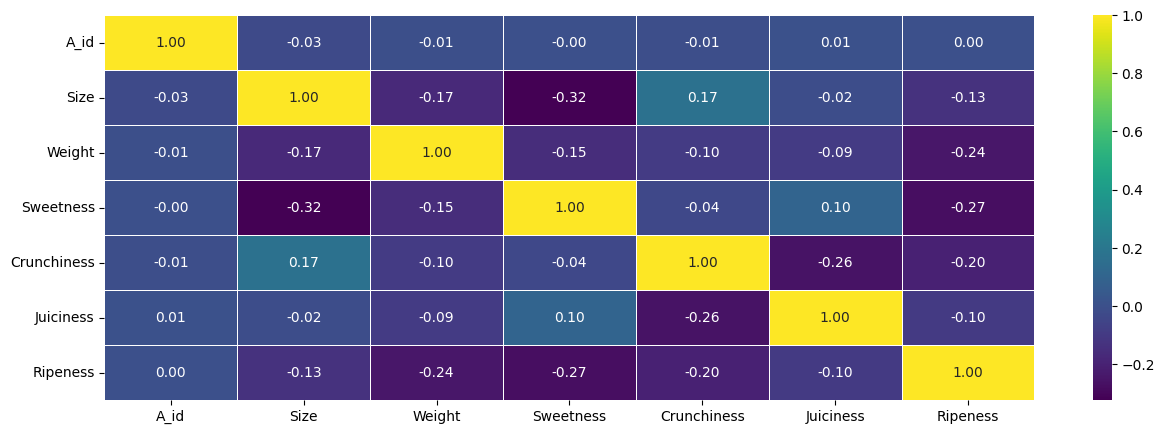

In [9]:
# Lets see the correlation:
plt.figure(figsize=(15,5))
sns.heatmap(data=df.corr(),annot=True,fmt=".2f",linewidth=0.7,cmap="viridis")

In [9]:
def hist_box_plot(data,col,bins="auto"):
  fig,axs = plt.subplots(ncols=2,figsize=(12,3))

  sns.histplot(data=data,x=col,ax=axs[0],bins=bins,kde=True)
  sns.boxplot(data=data,x=col,ax=axs[1])

### ***Lets see the Outliers:***

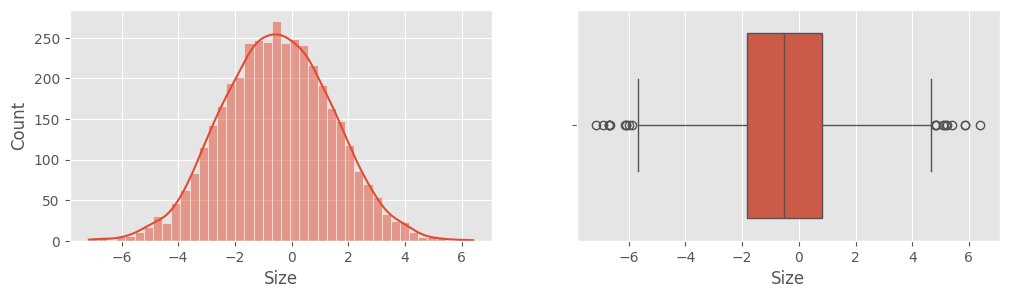

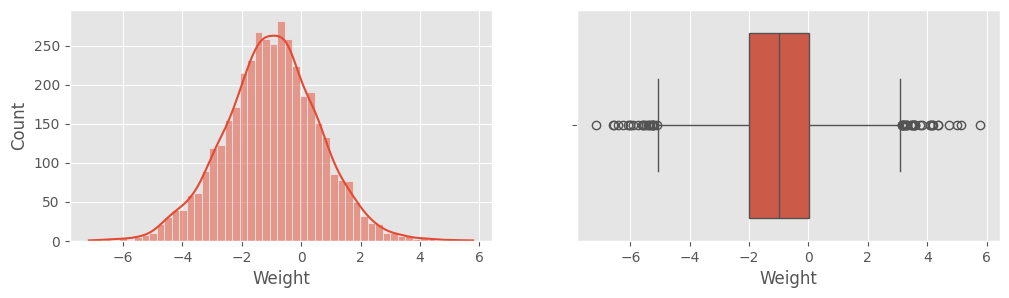

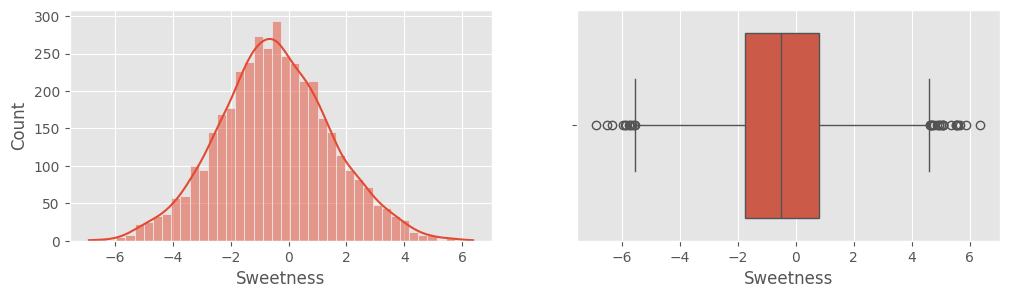

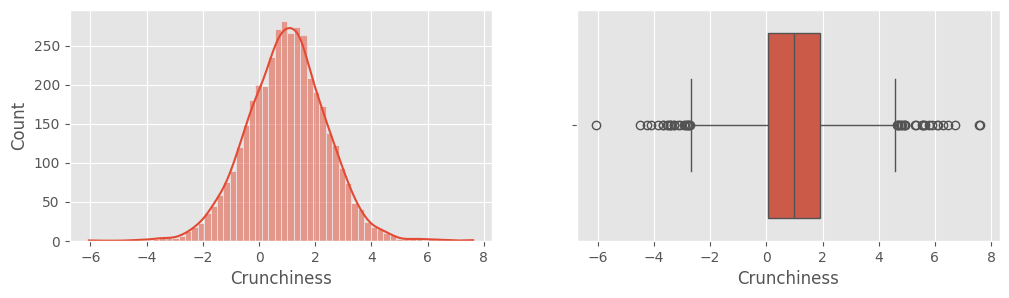

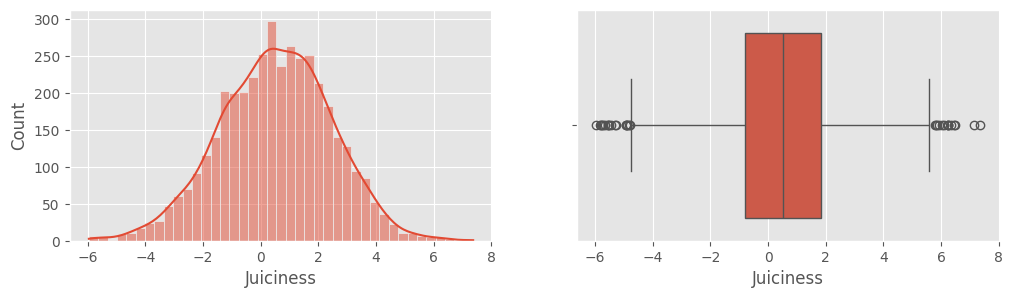

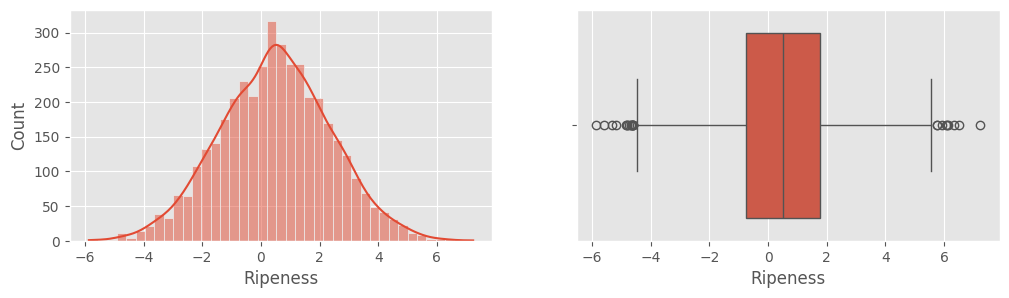

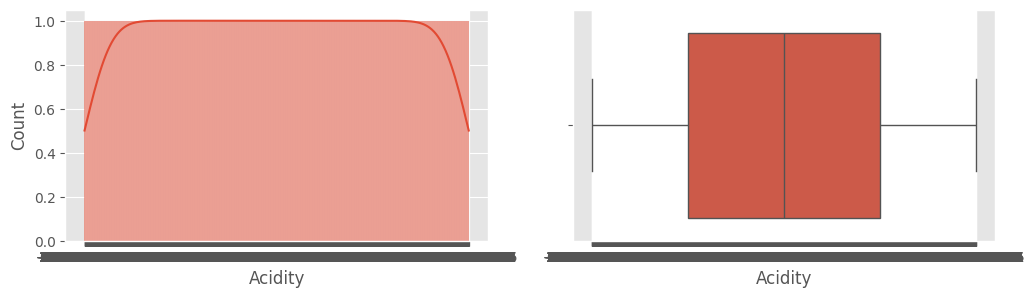

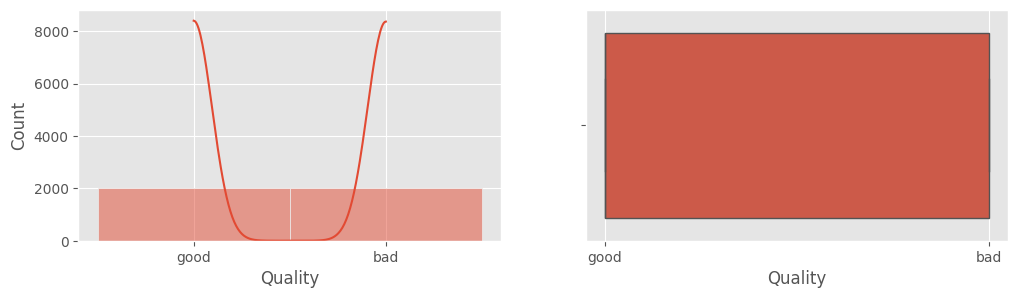

In [11]:
plt.style.use("ggplot")
for col in df.drop(columns=['A_id']).columns:
  hist_box_plot(df,col)

### ***IQR Method:***
- ***It used when we have data when is Not Normally Distributed..***
- Here Some data Data we have Normally Distributed..
- So In IQR method where we have data which beyond the min and max those are detected as Outliers...
- So to reduce the outliers we can set the value (Q1 - 1.5*IQR) for Below Min values and for the Outliers which are beyond the Max value t will be set by value (Q3 - 1.5 *IQR)..

### ***Zscore Method:***
- ***Only Used when we have Normally Distributed Curve..***
- Formula : Xi = Xi - mean / std
- formula as same as standardization...
- From above plot we get the Outliers and each features where the outliers is present it is Normally Distributed..
- If we ahve normally distributed curve there we can use Zscore method to reduce the Outliers..
- In Normal Distribution Curve we get that from range between -1 to 1 means it is range which calculates by (mean - 1*std) to (mean + 1*std). In this range 68 % data available under observataion...
- from range -2 to +2 --> mean - 2*std to mean + 2* std --> In between range Total 95% data under observation...
- from range -3 to +3 --> mean - 3*std to mean  + 3*std --> Total 99% data under observation...
- First we detects the outleris and if its beyong the range of +3 or we can say mean + 3std or below range -3 so it will be indicated as an Outlier...
- To Handle them we use Trim or Either we do capping:

### ***Triming:***
- If we know that if we drop the outlier then there will be no any impact on model performance and this outliers does not make a sense so we drop them..

### ***Capping:***
- If the curve is Normally Distributed so we handle the outlier by using mean + 3*std value and mean - 3*std value..
- for ex.. Suppose we have outlier beyond the range of mean + 3*std or +3 range then we fill them with +3 value (max value)..
- If we found the Outliers below the (mean - 3*std) range or -1 range so we fill them with (mean - 3*std) value... (min value)..



<Axes: >

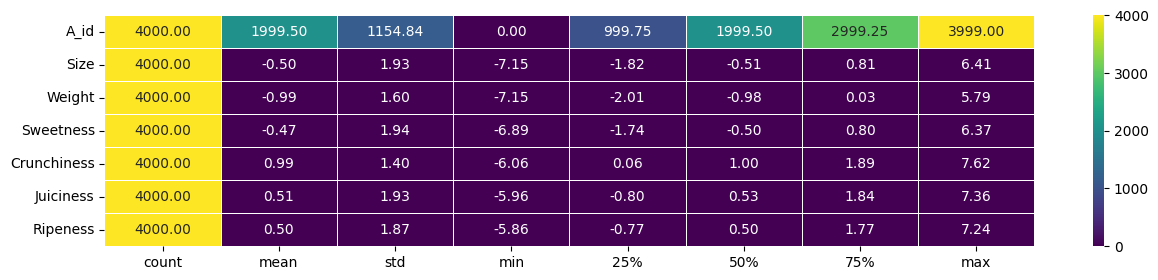

In [10]:
# lets see the statistics:
plt.figure(figsize=(15,3))
sns.heatmap(data=df.describe().T,annot=True,fmt=".2f",linewidth=0.7,cmap="viridis")

In [11]:
# lets find the min and max values:
# We are taking only those columns accoridng to the data where we have outliers...
for i in df.drop(columns=['Acidity','Quality','A_id']).columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper_case = (Q3 +  1.5* IQR)
  print(f"Highest Allowed Value in Feature {i} is: {upper_case}")

Highest Allowed Value in Feature Size is: 4.73896291425
Highest Allowed Value in Feature Weight is: 3.0950965391249996
Highest Allowed Value in Feature Sweetness is: 4.61244239625
Highest Allowed Value in Feature Crunchiness is: 4.641438949625
Highest Allowed Value in Feature Juiciness is: 5.791869691624999
Highest Allowed Value in Feature Ripeness is: 5.573044401624999


In [12]:
for i in df.drop(columns=['Acidity','Quality','A_id']).columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_case = (Q3 -  1.5* IQR)
  print(f"Lowest Allowed Value in Feature {i} is: {lower_case}")

Lowest Allowed Value in Feature Size is: -3.1279100152499995
Lowest Allowed Value in Feature Weight is: -3.033143659125
Lowest Allowed Value in Feature Sweetness is: -3.0085985542500002
Lowest Allowed Value in Feature Crunchiness is: -0.852970515625
Lowest Allowed Value in Feature Juiciness is: -2.119916916625
Lowest Allowed Value in Feature Ripeness is: -2.040621120125


##### ***lets fill the Outliers Values as per the features and if above the highest allowed range then value assigned by upper_case according to specific fearure..and if value below the range then value will assigned by lower_case accoridng to individual feature..***

In [13]:
for column in df.drop(columns=['Acidity', 'Quality', 'A_id']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

<Axes: >

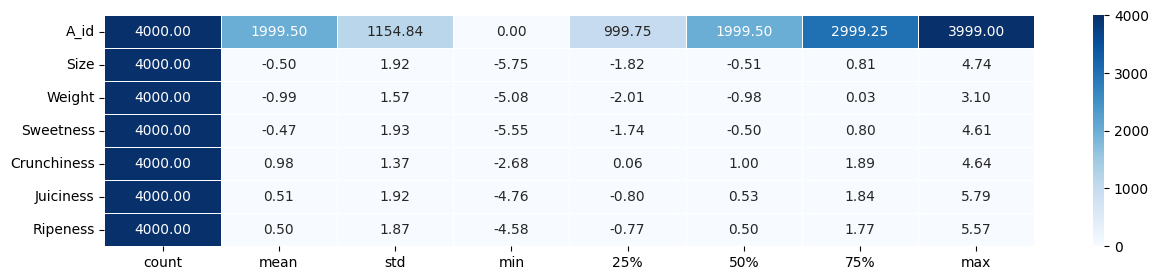

In [14]:
plt.figure(figsize=(15,3))
sns.heatmap(data = df.describe().T,annot=True,fmt=".2f",linewidth=0.7,cmap="Blues")

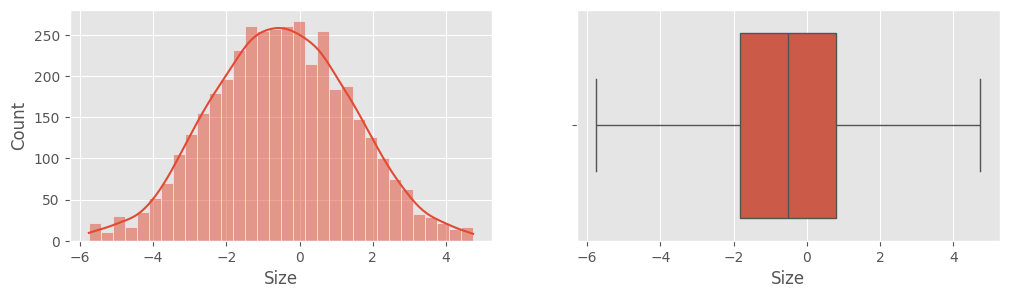

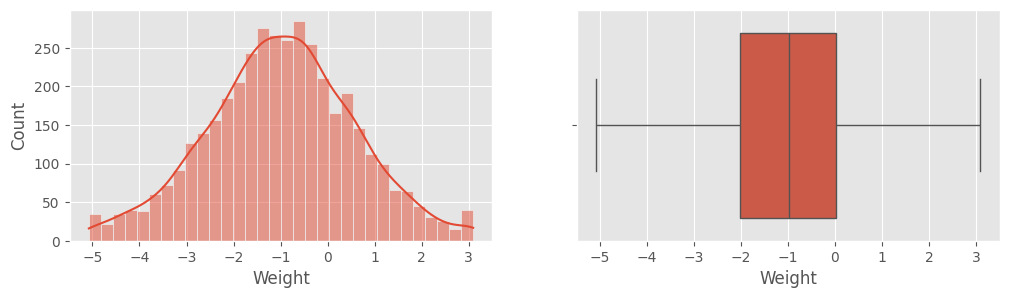

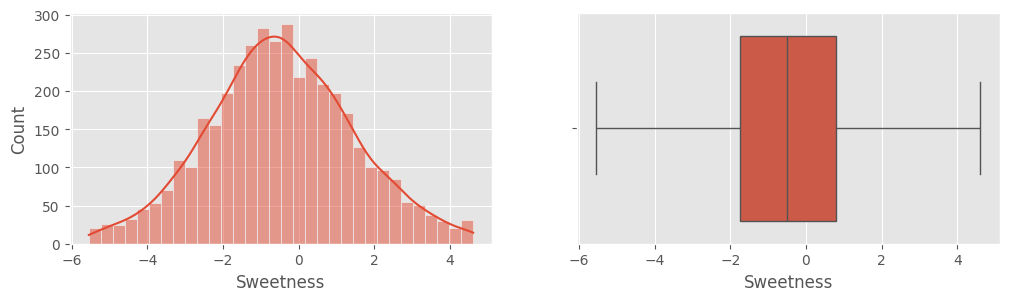

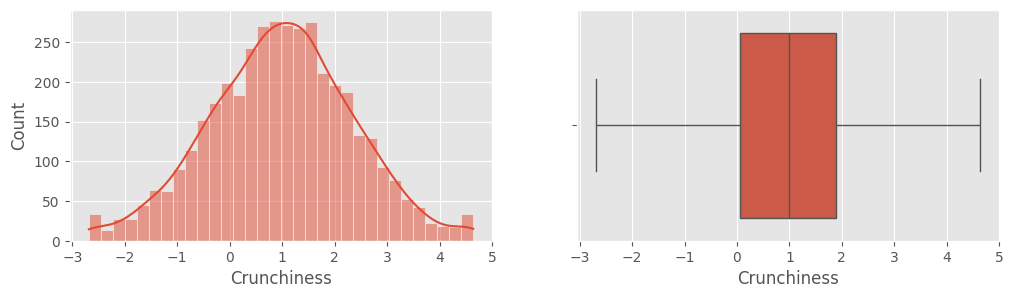

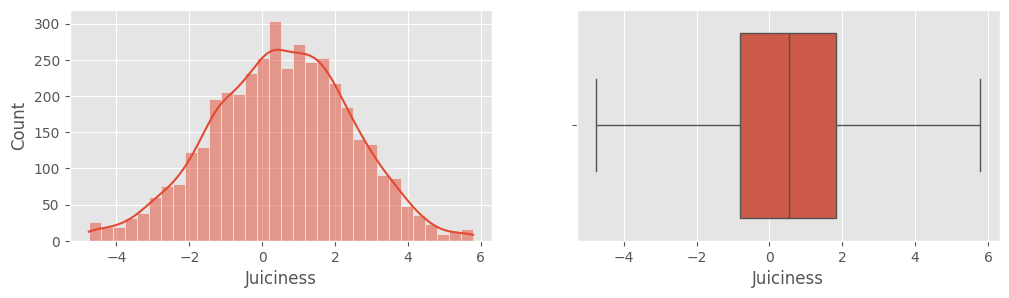

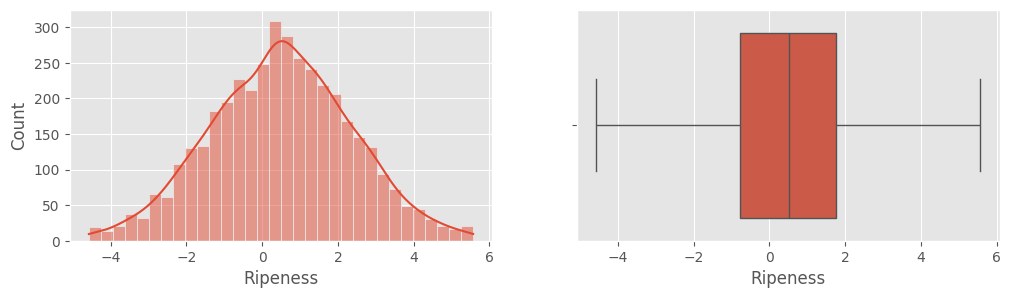

In [18]:
# Now we check the Hist and box plot:
plt.style.use("ggplot")
for i in ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness']:
  hist_box_plot(df,i)

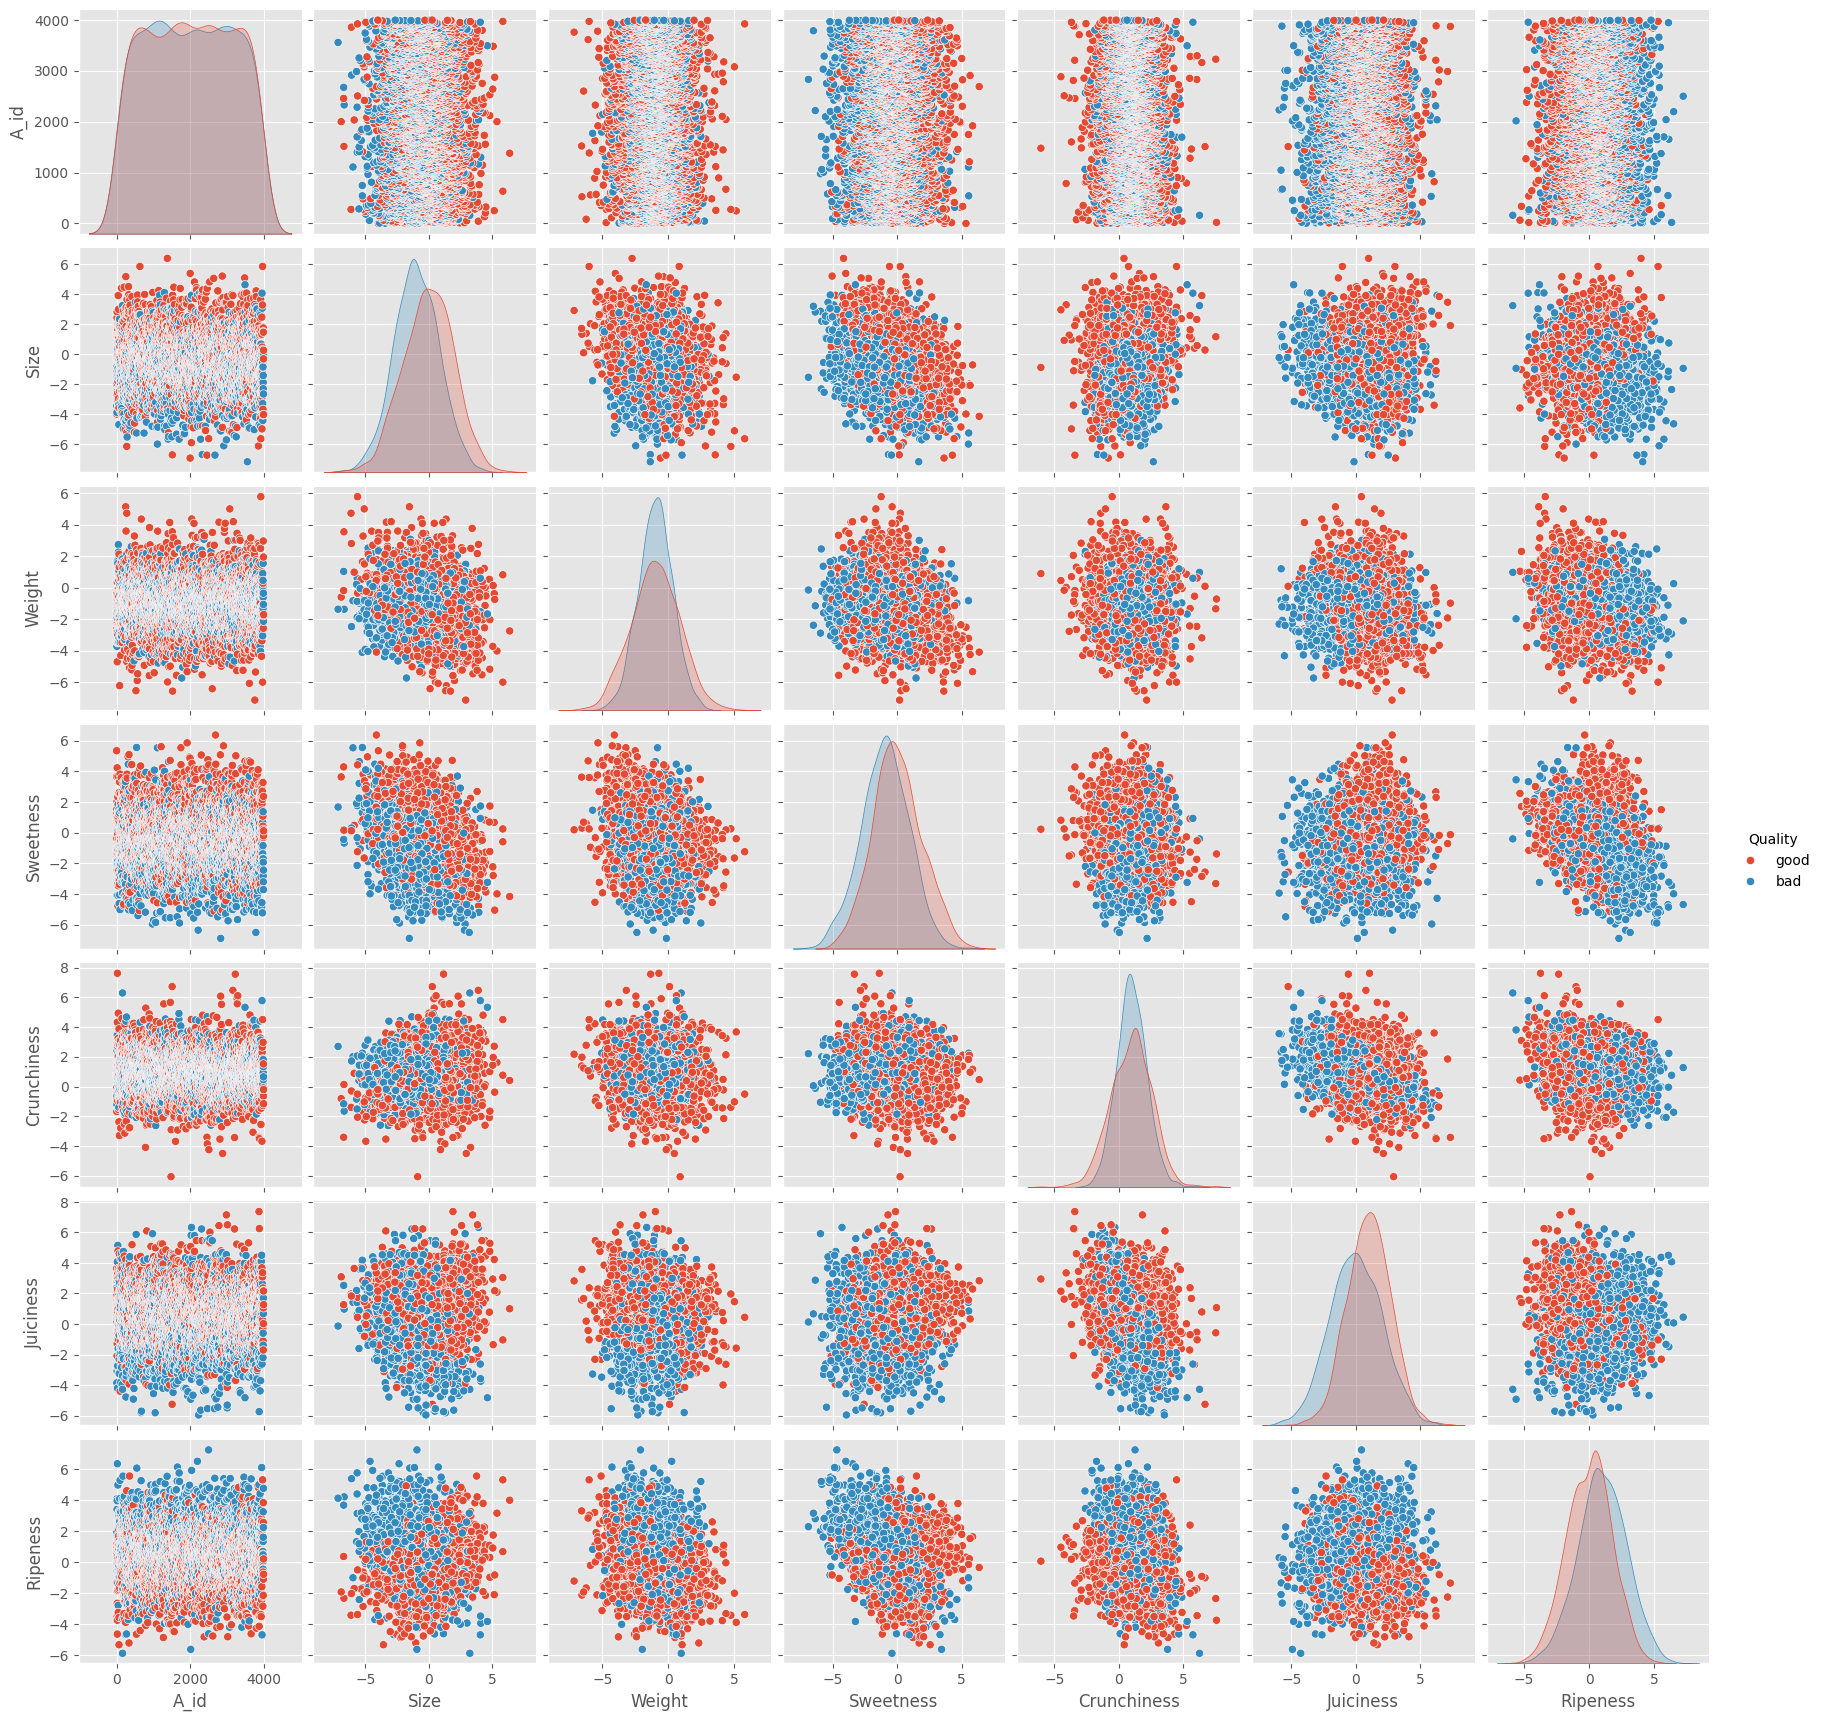

In [ ]:
# lets see the pairplot:
sns.pairplot(data=df,hue="Quality")

In [15]:
df.drop(columns=['A_id'],inplace=True)

In [17]:
# lets scaled the data as we have outliers:
from sklearn.preprocessing import RobustScaler,LabelEncoder,MinMaxScaler,StandardScaler


from sklearn.impute import SimpleImputer,KNNImputer


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline # pipeline is created beacuse when we have deploy the model so we have to dump the each operation,
# Instead of doing that all hectic process we are using steps and put in the pipeline so any unseen data occurs n server so it will do whole operation and gives output
# Now we are using Robust Scaler if any outlier occurs in unseen data so it will handle..


from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# eval:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

### ***Lets do Scaling...***
- As we reduce the Outlier so we know the Min and Max range so we can use MinMaxScaler...

In [18]:
mm = MinMaxScaler()

In [19]:
df_scaled = mm.fit_transform(df.drop(columns=['Quality']))
df_scaled

array([[0.16971348, 0.3137386 , 1.        , ..., 0.62584595, 0.4835072 ,
        0.45222503],
       [0.43425614, 0.27372873, 0.9066679 , ..., 0.53184557, 0.5364735 ,
        0.43618517],
       [0.52036341, 0.45583336, 0.3749996 , ..., 0.72004735, 0.44726909,
        0.66819226],
       ...,
       [0.29703852, 0.35952128, 0.30591138, ..., 0.65948009, 0.92028952,
        0.39374394],
       [0.16609496, 0.40344616, 0.77896273, ..., 0.65585195, 0.47214426,
        0.3316495 ],
       [0.57475893, 0.4112582 , 0.55801066, ..., 0.57103315, 0.37451785,
        0.59730634]])

In [28]:
df.Quality.value_counts(normalize=True)*100

good    50.1
bad     49.9
Name: Quality, dtype: float64

In [29]:
# lets use Label Encoder...
encode = LabelEncoder()

In [30]:
df_y_scaled = encode.fit_transform(df.Quality)

In [20]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(df_scaled,df_y_scaled,test_size=0.3,random_state=42)

In [22]:
x_test

array([[0.84369085, 0.41418861, 0.1839888 , ..., 0.50196768, 0.61454719,
        0.44853653],
       [0.68546823, 0.59379781, 0.54003419, ..., 0.53491269, 0.23510676,
        0.62179288],
       [0.66325471, 0.55891794, 0.71694463, ..., 0.39823785, 0.31979911,
        0.55633307],
       ...,
       [0.58645316, 0.64703427, 0.59576601, ..., 0.3404572 , 0.42406485,
        0.57537253],
       [0.39825607, 0.52133714, 0.5297767 , ..., 0.48489484, 0.61475207,
        0.29569478],
       [0.49924207, 0.43637185, 0.45656365, ..., 0.70784484, 0.49339223,
        0.43627923]])

### ***First Lets check the Best Model Performance and after that we can select the best one...***

In [32]:
def Model_Eval(x_train,y_train,x_test,y_test):

  classifiers =[
      LogisticRegression(),
      RandomForestClassifier(),
      GaussianNB(),
      BernoulliNB(),
      DecisionTreeClassifier(),
  ]

  class_names = [
      "LogisticRgerssion",
      "RandomforestClf",
      "Gaussian",
      "Benoulli",
      "DecisionTreeClf",
  ]

  Metrics = pd.DataFrame(columns=['Accuracy','Recall','Precision','f1'])

  for i,clf in enumerate(classifiers):

    clf.fit(x_train,y_train)

    y_pred = clf.predict(x_test)

    # performance of metrics:

    Accuracy = accuracy_score(y_test,y_pred)*100
    Precision = precision_score(y_test,y_pred)*100
    Recall = recall_score(y_test,y_pred)*100
    f1 = f1_score(y_test,y_pred)*100

    Metrics.loc[class_names[i],"Accuracy"] = Accuracy
    Metrics.loc[class_names[i],"Recall"] = Recall
    Metrics.loc[class_names[i],"Precision"] = Precision
    Metrics.loc[class_names[i],"f1"] = f1

  Metrics = Metrics.sort_values(by="Accuracy",ascending=False)

  return Metrics
Metrics = Model_Eval(x_train,y_train,x_test,y_test)

In [33]:
Metrics

,Accuracy,Recall,Precision,f1
RandomforestClf,88.666667,88.797364,88.797364,88.797364
DecisionTreeClf,78.916667,78.912685,79.304636,79.108175
LogisticRgerssion,75.0,75.782537,75.040783,75.409836
Gaussian,74.916667,74.299835,75.671141,74.979219
Benoulli,50.416667,2.306425,87.5,4.494382


In [55]:
# lets see the Data Accuracy:
def Data_Accuracy(x_train,y_train,x_test,y_test):

    classifiers_new =[
      LogisticRegression(),
      RandomForestClassifier(),
      GaussianNB(),
      BernoulliNB(),
      DecisionTreeClassifier(),
  ]

    classes_names = [
      "LogisticRgerssion",
      "RandomforestClf",
      "Gaussian",
      "Benoulli",
      "DecisionTreeClf",
  ]

    Data = {}

    for i,clf in enumerate(classifiers_new):

      clf.fit(x_train,y_train)

      score = clf.score(x_train,y_train)*100
      Data.update({classes_names[i]:score})

    data_accuracy = pd.DataFrame(data=Data.items(),columns=['classifiers','data_accuracy']).sort_values(by="data_accuracy",ascending=False)

    return data_accuracy

data_accuracy = Data_Accuracy(x_train,y_train,x_test,y_test)

In [56]:
data_accuracy

,classifiers,data_accuracy
1,RandomforestClf,100.000000
4,DecisionTreeClf,100.000000
2,Gaussian,74.928571
0,LogisticRgerssion,74.714286
3,Benoulli,51.250000


### ***We used MinMaxScaler above now lets use StandardScaler to check the performance again for comparision purpose..***

In [57]:
scaled = StandardScaler()

In [58]:
df_scaled_x = scaled.fit_transform(df.drop(columns=['Quality']))

In [59]:
df_scaled_x

array([[-1.80854482, -0.96619994,  2.63258712, ...,  0.69479552,
        -0.09015414, -0.26941526],
       [-0.36121408, -1.17385796,  2.14156359, ...,  0.17746311,
         0.19793838, -0.37899737],
       [ 0.10988463, -0.22870409, -0.65556258, ...,  1.21323425,
        -0.28725924,  1.20604367],
       ...,
       [-1.11194094, -0.72858009, -1.01903816, ...,  0.87990151,
         2.28557748, -0.66895013],
       [-1.82834198, -0.50060252,  1.46970207, ...,  0.85993397,
        -0.15195902, -1.09317096],
       [ 0.40748619, -0.46005671,  0.30726524, ...,  0.39313247,
        -0.68296532,  0.72176064]])

In [61]:
df_enocde_y = encode.fit_transform(df.Quality)

In [62]:
# Now we already created the EValuetion function so just we need to split the Data on basis of new scaled values:
x1_train,x1_test,y1_train,y1_test = train_test_split(df_scaled_x,df_enocde_y,test_size=0.2,random_state=0)

In [63]:
# lets see the metrics:
metrics = Model_Eval(x1_train,y1_train,x1_test,y1_test)

In [65]:
print(f"After using MinMaxScaler Models performance Evaluetion:\n\n{Metrics}")
print("*"*100)
print(f"After Using StandardScaler Models performance Evaluetion:\n\n{metrics}")

After using MinMaxScaler Models performance Evaluetion:

                    Accuracy     Recall  Precision         f1
RandomforestClf    88.666667  88.797364  88.797364  88.797364
DecisionTreeClf    78.916667  78.912685  79.304636  79.108175
LogisticRgerssion       75.0  75.782537  75.040783  75.409836
Gaussian           74.916667  74.299835  75.671141  74.979219
Benoulli           50.416667   2.306425       87.5   4.494382
****************************************************************************************************
After Using StandardScaler Models performance Evaluetion:

                  Accuracy     Recall  Precision         f1
RandomforestClf      88.75  91.005291       86.0  88.431877
DecisionTreeClf       77.0  77.513228  74.744898  76.103896
LogisticRgerssion    75.25  76.984127   72.38806  74.615385
Gaussian             74.75  77.248677  71.568627  74.300254
Benoulli             65.25  74.074074  60.869565  66.825776


In [66]:
DataAcc = Data_Accuracy(x1_train,y1_train,x1_test,y1_test)

In [68]:
print(f"After using MinMaxScaler Data accuracy of models:\n\n{data_accuracy}")
print("*"*100)
print(f"After Using StandardScaler Data accuracy of models:\n\n{DataAcc}")

After using MinMaxScaler Data accuracy of models:

         classifiers  data_accuracy
1    RandomforestClf     100.000000
4    DecisionTreeClf     100.000000
2           Gaussian      74.928571
0  LogisticRgerssion      74.714286
3           Benoulli      51.250000
****************************************************************************************************
After Using StandardScaler Data accuracy of models:

         classifiers  data_accuracy
1    RandomforestClf      100.00000
4    DecisionTreeClf      100.00000
2           Gaussian       75.21875
0  LogisticRgerssion       74.75000
3           Benoulli       63.25000


### ***As per Comapirsion We are going to use RandomForestClassifier. After using standard Scaler just 0.20 to 1 % difference occurs in data accuracy.. but in recall score it increase by 3 % and precision reduced by 1.5 %...So we have to use StandardScaler instead MinMaScaler..***

In [70]:
df[:2]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.32984,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [71]:
trf1 = ColumnTransformer([
    ("Imputer",KNNImputer(),slice(0,7))
],remainder='passthrough')

In [72]:
trf2 = ColumnTransformer([
    ("Scale",StandardScaler(),slice(0,7)),
],remainder='passthrough')

In [73]:
trf3 = RandomForestClassifier()

In [75]:
pipe = make_pipeline(trf1,trf2,trf3)

In [76]:
# train:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Imputer', KNNImputer(),
                                                  slice(0, 7, None))])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale', StandardScaler(),
                                                  slice(0, 7, None))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [77]:
# if we wants to check how robust scaler scaled the values within median IQR range:
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('Imputer', KNNImputer(), slice(0, 7, None))]),
 'columntransformer-2': ColumnTransformer(remainder='passthrough',
                   transformers=[('Scale', StandardScaler(), slice(0, 7, None))]),
 'randomforestclassifier': RandomForestClassifier()}

In [78]:
# for checking the values we used in transformer we have to use this code:
from sklearn import set_config
set_config(display="diagram")

In [83]:
pipe.named_steps['columntransformer-2'].transformers_[0][1].scale_

array([0.182354  , 0.19210801, 0.19078409, 0.18631564, 0.18315929,
       0.18380675, 0.14584838])

In [84]:
# test:
y_pred = pipe.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [86]:
# actual:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [87]:
# score:
pipe.score(x_train,y_train)*100

100.0

In [88]:
accuracy_score(y_test,y_pred)*100

89.58333333333334

In [ ]:
# Lets dump this file
# if we  create a pipeline so we dnt have to dump each preprocessing technique to deal with unsen value
# if we dont create a pipeline then we have so many hetic work to do

In [89]:
import pickle
pickle.dump(pipe,open("AppleQualityNew.pkl","wb"))

In [90]:
df.sample(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3910,1.535385,-0.979619,-1.385863,0.482993,1.999626,-0.394965,3.405436263,good
3577,-0.054052,-3.361424,0.321272,0.902747,0.751228,-1.879126,-0.395249528,good
3296,1.339489,-0.984984,-0.245295,1.863707,1.636745,-2.173060,1.108448274,good
899,2.081553,-3.903800,2.628814,3.289790,0.304922,2.287816,2.600239701,good
1065,-3.193772,2.130106,-0.247501,-2.620954,4.226314,4.590347,1.529106684,bad
